In [4]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from model.KANModel import KKAN_Convolutional_Network ## Kolmogrov_Arnold CNN Model
from model.MLPModel import ConvNet ## MLP CNN Model (Big)
from model.SimpleMLP import SimpleCNN ## MLP CNN Model (Big)
from model.train_test import train_and_test_models

In [14]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

Using downloaded and verified file: ./data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 28881/28881 [00:00<00:00, 35171.26it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████| 1648877/1648877 [00:19<00:00, 84318.26it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 3047596.99it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") ## setting the device

In [17]:
model_ConvNet = ConvNet()
model_ConvNet.to(device)
optimizer_ConvNet = optim.AdamW(model_ConvNet.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_ConvNet = optim.lr_scheduler.ExponentialLR(optimizer_ConvNet, gamma=0.8)
criterion_ConvNet = nn.CrossEntropyLoss()
all_train_loss_ConvNet, all_test_loss_ConvNet, all_test_accuracy_ConvNet, all_test_precision_ConvNet, all_test_recall_ConvNet, all_test_f1_ConvNet = train_and_test_models(model_ConvNet, device, train_loader, test_loader, optimizer_ConvNet, criterion_ConvNet, epochs=10, scheduler=scheduler_ConvNet)

100%|████████████████████████████████████████| 938/938 [00:06<00:00, 139.45it/s]


End of Epoch 1: Train Loss: 0.192012, Test Loss: 0.0007, Accuracy: 98.66%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 148.19it/s]


End of Epoch 2: Train Loss: 0.060995, Test Loss: 0.0005, Accuracy: 99.09%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 145.61it/s]


End of Epoch 3: Train Loss: 0.045924, Test Loss: 0.0004, Accuracy: 99.22%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 147.29it/s]


End of Epoch 4: Train Loss: 0.035159, Test Loss: 0.0003, Accuracy: 99.39%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 147.36it/s]


End of Epoch 5: Train Loss: 0.028672, Test Loss: 0.0003, Accuracy: 99.43%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 146.29it/s]


End of Epoch 6: Train Loss: 0.021120, Test Loss: 0.0003, Accuracy: 99.44%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 144.82it/s]


End of Epoch 7: Train Loss: 0.018609, Test Loss: 0.0003, Accuracy: 99.49%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 145.67it/s]


End of Epoch 8: Train Loss: 0.017426, Test Loss: 0.0002, Accuracy: 99.53%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 145.31it/s]


End of Epoch 9: Train Loss: 0.013832, Test Loss: 0.0002, Accuracy: 99.56%


100%|████████████████████████████████████████| 938/938 [00:06<00:00, 145.17it/s]


End of Epoch 10: Train Loss: 0.012319, Test Loss: 0.0002, Accuracy: 99.51%


In [35]:
model_SimpleCNN = SimpleCNN()
model_SimpleCNN.to(device)
optimizer_SimpleCNN = optim.AdamW(model_SimpleCNN.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_SimpleCNN = optim.lr_scheduler.ExponentialLR(optimizer_SimpleCNN, gamma=0.8)
criterion_SimpleCNN = nn.CrossEntropyLoss()
all_train_loss_SimpleCNN, all_test_loss_SimpleCNN, all_test_accuracy_SimpleCNN, all_test_precision_SimpleCNN, all_test_recall_SimpleCNN, all_test_f1_SimpleCNN = train_and_test_models(model_SimpleCNN, device, train_loader, test_loader, optimizer_SimpleCNN, criterion_SimpleCNN, epochs=10, scheduler=scheduler_SimpleCNN)


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 235.84it/s]


End of Epoch 1: Train Loss: 0.415570, Test Loss: 0.0023, Accuracy: 95.59%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 237.47it/s]


End of Epoch 2: Train Loss: 0.128872, Test Loss: 0.0015, Accuracy: 97.15%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 241.44it/s]


End of Epoch 3: Train Loss: 0.101520, Test Loss: 0.0014, Accuracy: 97.29%


100%|████████████████████████████████████████| 938/938 [00:04<00:00, 222.76it/s]


End of Epoch 4: Train Loss: 0.088963, Test Loss: 0.0012, Accuracy: 97.49%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 242.43it/s]


End of Epoch 5: Train Loss: 0.081487, Test Loss: 0.0012, Accuracy: 97.82%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 243.83it/s]


End of Epoch 6: Train Loss: 0.075795, Test Loss: 0.0011, Accuracy: 97.74%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 240.10it/s]


End of Epoch 7: Train Loss: 0.072419, Test Loss: 0.0010, Accuracy: 97.86%


100%|████████████████████████████████████████| 938/938 [00:03<00:00, 236.90it/s]


End of Epoch 8: Train Loss: 0.069480, Test Loss: 0.0011, Accuracy: 97.76%


100%|████████████████████████████████████████| 938/938 [00:04<00:00, 233.85it/s]


End of Epoch 9: Train Loss: 0.067437, Test Loss: 0.0010, Accuracy: 97.87%


100%|████████████████████████████████████████| 938/938 [00:04<00:00, 223.32it/s]


End of Epoch 10: Train Loss: 0.065810, Test Loss: 0.0010, Accuracy: 97.91%


In [28]:
model_KKAN_Convolutional_Network = KKAN_Convolutional_Network(device = device)
model_KKAN_Convolutional_Network.to(device)
optimizer_KKAN_Convolutional_Network = optim.AdamW(model_KKAN_Convolutional_Network.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_KKAN_Convolutional_Network = optim.lr_scheduler.ExponentialLR(optimizer_KKAN_Convolutional_Network, gamma=0.8)
criterion_KKAN_Convolutional_Network = nn.CrossEntropyLoss()

all_train_loss_KKAN_Convolutional_Network, all_test_loss_KKAN_Convolutional_Network, all_test_accuracy_KKAN_Convolutional_Network, all_test_precision_KKAN_Convolutional_Network, all_test_recall_KKAN_Convolutional_Network, all_test_f1_KKAN_Convolutional_Network = train_and_test_models(model_KKAN_Convolutional_Network, device, train_loader, test_loader, optimizer_KKAN_Convolutional_Network, criterion_KKAN_Convolutional_Network, epochs=10, scheduler=scheduler_KKAN_Convolutional_Network)


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.99it/s]


End of Epoch 1: Train Loss: 0.293684, Test Loss: 0.0013, Accuracy: 97.39%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.97it/s]


End of Epoch 2: Train Loss: 0.071361, Test Loss: 0.0010, Accuracy: 97.94%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.93it/s]


End of Epoch 3: Train Loss: 0.050045, Test Loss: 0.0008, Accuracy: 98.32%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.96it/s]


End of Epoch 4: Train Loss: 0.038911, Test Loss: 0.0008, Accuracy: 98.44%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.94it/s]


End of Epoch 5: Train Loss: 0.031125, Test Loss: 0.0007, Accuracy: 98.48%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.97it/s]


End of Epoch 6: Train Loss: 0.026033, Test Loss: 0.0007, Accuracy: 98.44%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 11.00it/s]


End of Epoch 7: Train Loss: 0.022232, Test Loss: 0.0007, Accuracy: 98.49%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 11.00it/s]


End of Epoch 8: Train Loss: 0.019433, Test Loss: 0.0007, Accuracy: 98.49%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.99it/s]


End of Epoch 9: Train Loss: 0.017298, Test Loss: 0.0007, Accuracy: 98.52%


100%|█████████████████████████████████████████| 938/938 [01:25<00:00, 10.93it/s]


End of Epoch 10: Train Loss: 0.015720, Test Loss: 0.0007, Accuracy: 98.53%


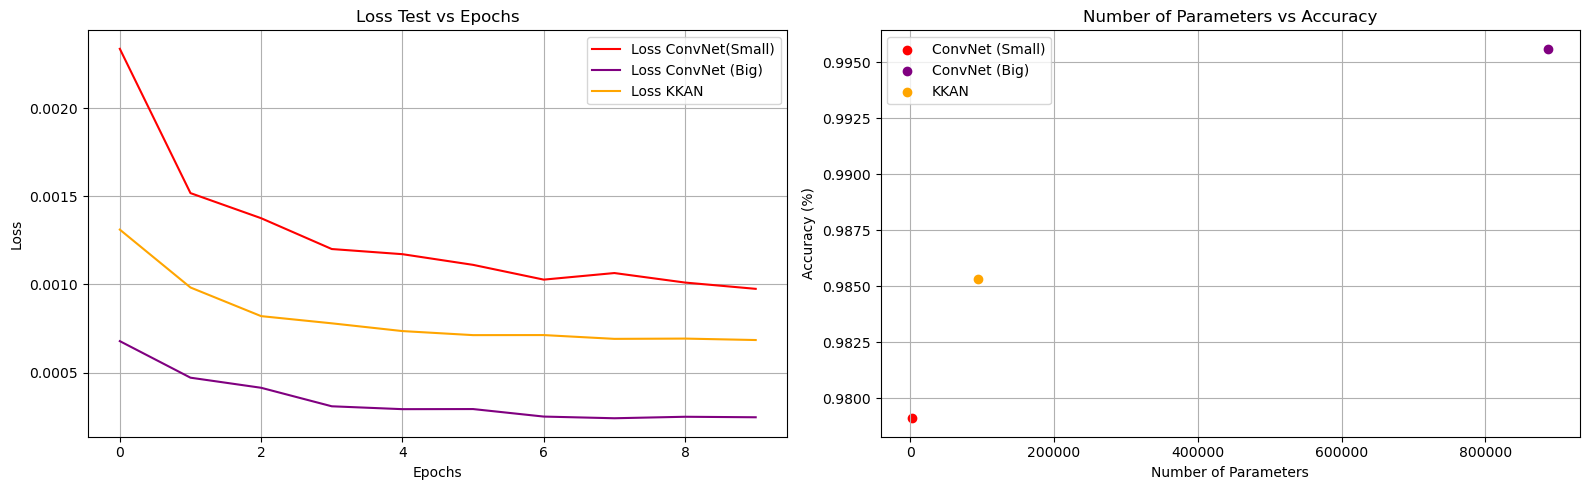

In [36]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))  

ax1.plot(all_test_loss_SimpleCNN, label='Loss ConvNet(Small)', color='red')

ax1.plot(all_test_loss_ConvNet, label='Loss ConvNet (Big)', color='purple')
ax1.plot(all_test_loss_KKAN_Convolutional_Network, label='Loss KKAN', color='orange')

ax1.set_title('Loss Test vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.scatter(count_parameters(model_SimpleCNN), max(all_test_accuracy_SimpleCNN), color='red', label='ConvNet (Small)')
ax2.scatter(count_parameters(model_ConvNet), max(all_test_accuracy_ConvNet), color='purple', label='ConvNet (Big)')
ax2.scatter(count_parameters(model_KKAN_Convolutional_Network), max(all_test_accuracy_KKAN_Convolutional_Network), color='orange', label='KKAN')

ax2.set_title('Number of Parameters vs Accuracy')
ax2.set_xlabel('Number of Parameters')
ax2.set_ylabel('Accuracy (%)')
ax2.legend() 
ax2.grid(True)

plt.tight_layout()
plt.show()

In [39]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Listas para acumular datos
accs = []
precision = []
recall = []
f1s = []
params_counts = []


models = [model_SimpleCNN, model_ConvNet, model_KKAN_Convolutional_Network]


for i, m in enumerate(models):
    index = np.argmax(m.all_test_accuracy)
    params_counts.append(count_parameters(m))
    accs.append(m.all_test_accuracy[index])
    precision.append(m.all_test_precision[index])
    recall.append(m.all_test_recall[index])
    f1s.append(m.all_test_f1[index])


df = pd.DataFrame({
    "Test Accuracy": accs,
    "Test Precision": precision,
    "Test Recall": recall,
    "Test F1 Score": f1s,
    "Number of Parameters": params_counts
}, index=["ConvNet (Small)","ConvNet (Big)", "KKAN"])

df.to_csv('experiment_28x28.csv', index=False)

df_styled = df.style.apply(highlight_max, subset=df.columns[:], axis=0).format('{:.3f}')

In [40]:
df_styled

,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Number of Parameters
ConvNet (Small),0.979,0.979,0.979,0.979,2740.000
ConvNet (Big),0.996,0.996,0.996,0.996,887530.000
KKAN,0.985,0.985,0.985,0.985,94650.000
